In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# 1 - Modelo de Classificação Linear

In [4]:
# Inicialização do LDA
lda = LinearDiscriminantAnalysis()

In [3]:
# Carregando conjunto de treino e teste
treino = pd.read_excel('Homework03/hw3-data/cls_trated_train_set.xlsx')
teste = pd.read_excel('Homework03/hw3-data/cls_trated_test_set.xlsx')

In [4]:
# Organizando os conjuntos
treino = treino.drop(columns=['Unnamed: 0'])
teste = teste.drop(columns=['Unnamed: 0'])
x_treino = treino.T.iloc[0:-1]
y_treino = treino['MOS']
x_teste = teste.T.iloc[0:-1]
y_teste = teste['MOS']
x_treino,x_teste,y_treino,y_teste = x_treino.T,x_teste.T,y_treino.T,y_teste.T

In [7]:
lda.fit(x_treino,y_treino) # Treinando o LDA
pred = lda.predict(x_teste) # Testando o LDA
CM = confusion_matrix(y_teste,pred) # Cálculo da confusion matrix
pont = lda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM}')

A análise de discriminante linear conseguiu prever 57.42% das amostras

Confusion Matrix: 
 [[1363  659    8    0   15]
 [ 182 1188    1    0    4]
 [ 163   27    8    0   18]
 [  15  104    3    0    1]
 [ 416  300   16    0   46]]


# 2 - Modelo de Classificação não Linear

## 2.1 - Análise de discriminante quadratico

In [5]:
#Inicialização do QDA
qda = QuadraticDiscriminantAnalysis()

In [9]:
qda.fit(x_treino,y_treino) # Treinando o QDA
pred_qda = qda.predict(x_teste) # Testando o QDA
CM_qda = confusion_matrix(y_teste,pred_qda) # Cálculo da confusion matrix
pont_qda = qda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont_qda:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_qda}')

A análise de discriminante linear conseguiu prever 57.57% das amostras

Confusion Matrix: 
 [[1327  622   44   13   39]
 [ 210 1131   10    9   15]
 [ 132   25   31    0   28]
 [  20   70    7   23    3]
 [ 351  280   45    2  100]]


## 2.2 - k-Nearest Neighbors

In [33]:
#Inicialização dos KNN's com k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61]
knn_ = KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=7),KNeighborsClassifier(n_neighbors=9),KNeighborsClassifier(n_neighbors=11),KNeighborsClassifier(n_neighbors=13),KNeighborsClassifier(n_neighbors=15),KNeighborsClassifier(n_neighbors=17),KNeighborsClassifier(n_neighbors=19),KNeighborsClassifier(n_neighbors=21),KNeighborsClassifier(n_neighbors=23),KNeighborsClassifier(n_neighbors=25),KNeighborsClassifier(n_neighbors=27),KNeighborsClassifier(n_neighbors=29),KNeighborsClassifier(n_neighbors=31),KNeighborsClassifier(n_neighbors=35),KNeighborsClassifier(n_neighbors=41),KNeighborsClassifier(n_neighbors=45),KNeighborsClassifier(n_neighbors=51),KNeighborsClassifier(n_neighbors=55),KNeighborsClassifier(n_neighbors=61)

In [36]:
pred_knn = np.zeros([len(x_teste),len(knn_)])
CM_knn = np.zeros([len(knn_),5,5])
pont_knn = np.zeros(len(knn_))
for i in range(len(knn_)):
    knn_[i].fit(x_treino,y_treino)
    pred_knn[:,i] = knn_[i].predict(x_teste)
    CM_knn[i,:,:] = confusion_matrix(y_teste,pred_knn[:,i])
    pont_knn[i] = knn_[i].score(x_teste,y_teste)

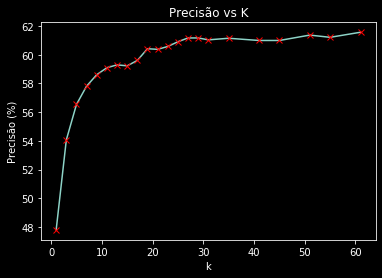

In [37]:
plt.figure(1)
plt.plot([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61],pont_knn*100,'-',[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61],pont_knn*100,'rx')
plt.title('Precisão vs K')
plt.ylabel('Precisão (%)')
plt.xlabel('k')
plt.show()

## 2.3 - Rede Neural

In [56]:
NW = MLPClassifier()

In [57]:
NW.fit(x_treino,y_treino)
pred_NW = NW.predict(x_teste)
CM_NW = confusion_matrix(y_teste,pred_NW)
pont_NW = NW.score(x_teste,y_teste)
print(f'A rede neural conseguiu prever {100*pont_NW:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_NW}')

A rede neural conseguiu prever 61.03% das amostras

Confusion Matrix: 
 [[1360  597    7   15   66]
 [ 221 1134    0    8   12]
 [ 106   21    9    0   80]
 [  17   67    1   29    9]
 [ 273  263    4    1  237]]


## 2.4 - Support Vector Machine

In [64]:
svc = SVC(gamma = 'scale')

In [65]:
svc.fit(x_treino,y_treino)
pred_svc = svc.predict(x_teste)
CM_svc = confusion_matrix(y_teste,pred_svc)
pont_svc = svc.score(x_teste,y_teste)
print(f'O Support vector machine conseguiu prever {100*pont_svc:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_svc}')

O Support vector machine conseguiu prever 60.86% das amostras

Confusion Matrix: 
 [[1340  644    0   10   51]
 [ 188 1176    0    5    6]
 [ 116   27    1    0   72]
 [  13   80    1   22    7]
 [ 270  285    0    1  222]]
